# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single DataFram
combined_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")  # Corrected 'mouse_metadata_path' to 'study_results' and fixed syntax


# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice.
num_of_mice = mouse_metadata["Mouse ID"].unique()
len(num_of_mice)

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_array = duplicate_mice.to_numpy()

print(duplicate_mice_array)


[['g989' 'Propriva' 'Female' 21 26 0 45.0 0]
 ['g989' 'Propriva' 'Female' 21 26 0 45.0 0]
 ['g989' 'Propriva' 'Female' 21 26 5 48.78680146 0]
 ['g989' 'Propriva' 'Female' 21 26 5 47.57039208 0]
 ['g989' 'Propriva' 'Female' 21 26 10 51.74515613 0]
 ['g989' 'Propriva' 'Female' 21 26 10 49.8805278 0]
 ['g989' 'Propriva' 'Female' 21 26 15 51.32585207 1]
 ['g989' 'Propriva' 'Female' 21 26 15 53.44201976 0]
 ['g989' 'Propriva' 'Female' 21 26 20 55.32612202 1]
 ['g989' 'Propriva' 'Female' 21 26 20 54.65765008 1]]


In [26]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique() 
all_duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]  
all_duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID'], keep='last')
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [28]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique mice in the clean DataFrame: {number_of_mice}")

Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

summary_stats = pd.DataFrame({
    "mean" : cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
"median" : cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
"variance" : cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
"std_dev" : cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
"SEM" : cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(),
})

# Assemble the resulting series into a single summary DataFrame.
summary_stats

,mean,median,variance,std_dev,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats_a = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
).reset_index()


# Using the aggregation method, produce the same summary statistics in a single line
print(summary_stats_a)

  Drug Regimen       Mean     Median   Variance   Std_Dev       SEM
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.322552  50.854632  42.351070  6.507770  0.512884
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

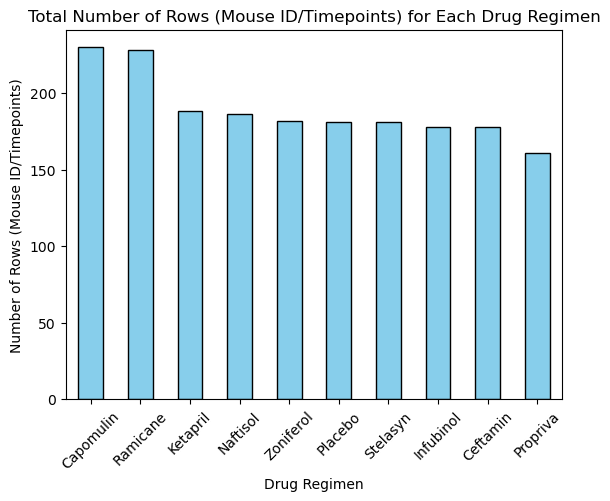

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')


In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = combined_data['Drug Regimen'].value_counts()

# Generate the bar plot
regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=45)
plt.show()

print(mouse_metadata.columns)

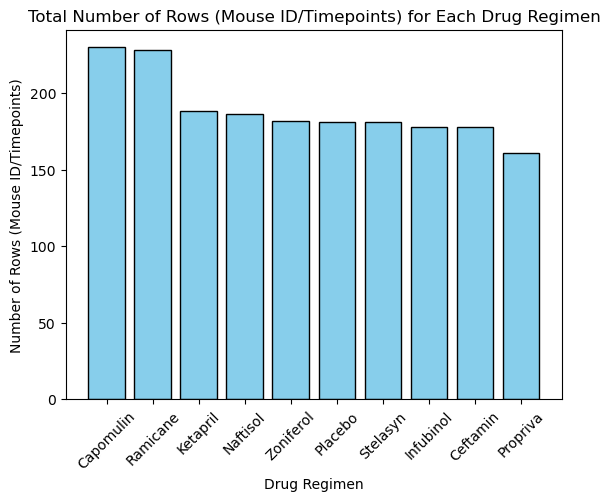

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = combined_data['Drug Regimen'].value_counts()

plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', edgecolor='black')
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=45)
plt.show()



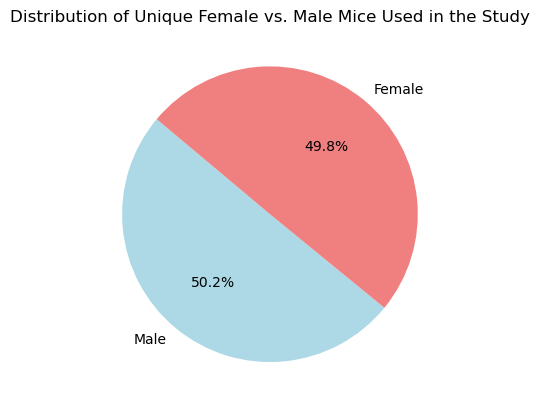

In [33]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = combined_data.drop_duplicates(subset='Mouse ID')
gender_counts = unique_mice['Sex'].value_counts()


# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Unique Female vs. Male Mice Used in the Study")
plt.show()

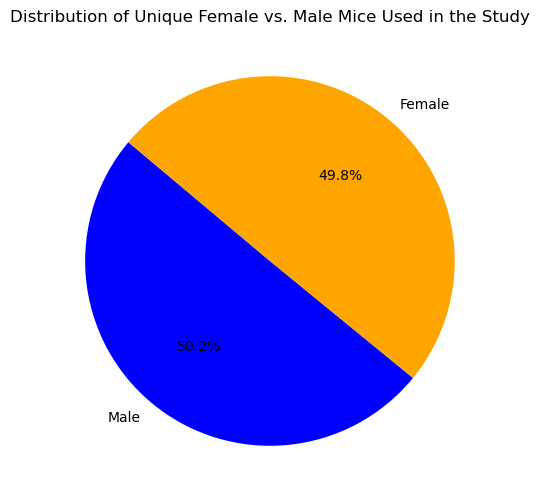

In [34]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = combined_data.drop_duplicates(subset='Mouse ID')
gender_counts = unique_mice['Sex'].value_counts()


# Make the pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title("Distribution of Unique Female vs. Male Mice Used in the Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = selected_regimens.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = last_timepoints.merge(
    cleaned_data,
    on=['Mouse ID'],
    how='left'
)
final_tumor_volume

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,45,67.973419,2
1,a251,45,Infubinol,Female,21,25,45,65.525743,1
2,a275,45,Ceftamin,Female,20,28,45,62.999356,3
3,a411,45,Ramicane,Male,3,22,45,38.407618,1
4,a444,45,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,45,68.594745,4
96,y793,45,Capomulin,Male,17,17,45,31.896238,2
97,y865,45,Ceftamin,Male,23,26,45,64.729837,3
98,z578,45,Ramicane,Male,11,16,45,30.638696,0


In [36]:
# List of treatment regimens for looping and labeling
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each treatment
tumor_vol_data = []

# Loop through each treatment in the treatments list
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # Calculate the first and third quartiles (Q1 and Q3)
    quartile_1 = treatment_data.quantile(0.25)
    quartile_3 = treatment_data.quantile(0.75)
    iqr = quartile_3 - quartile_1

    # Determine the lower and upper bounds to identify outliers
    lower_bound = quartile_1 - (1.5 * iqr)
    upper_bound = quartile_3 + (1.5 * iqr)
    
    # Filter the tumor volumes that are outliers for this specific treatment
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Append tumor volumes (and outliers, if needed) for each treatment
    tumor_vol_data.append(treatment_data)
    print(f"{treatment} outliers:", outliers) 

    

Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


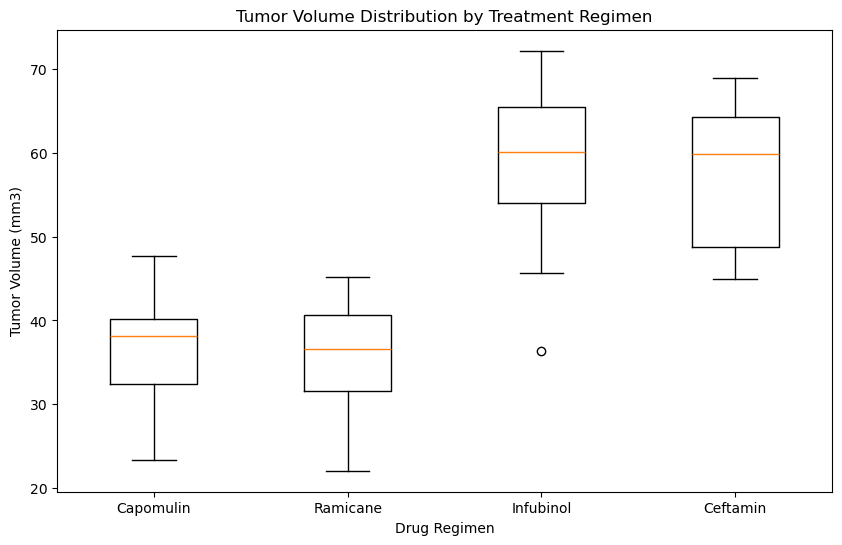

In [37]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Generate the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, tick_labels=treatments)

# Adding titles and labels
plt.title('Tumor Volume Distribution by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
red_dot = dict(markerfacecolor = "red")

# Show the plot
plt.show()

## Line and Scatter Plots

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomul 
line_df = cleaned_data.loc[cleaned_data["Mouse ID"] == "l509",:]
line_df.head ()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
380,l509,Capomulin,Male,17,21,45,41.483008,3


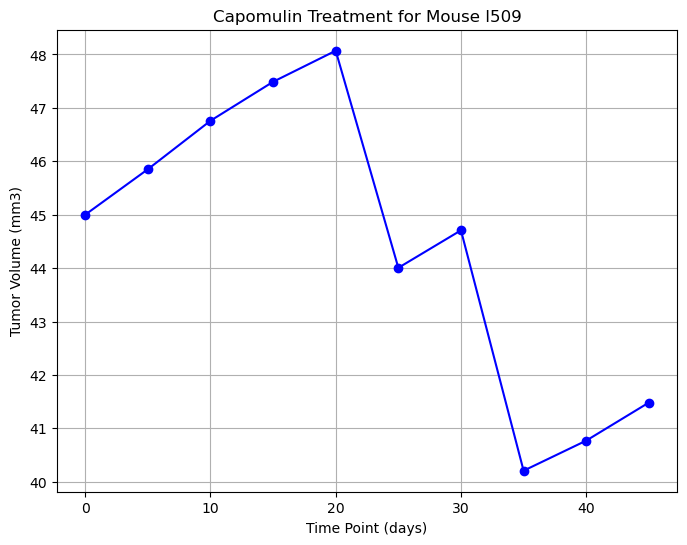

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomul 
capomulin_mouse = combined_data[(combined_data['Drug Regimen'] == 'Capomulin') & (combined_data['Mouse ID'] == 'l509')]

# Line plot for tumor volume vs. time point
plt.figure(figsize=(8, 6))
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-')
plt.title('Capomulin Treatment for Mouse l509')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()





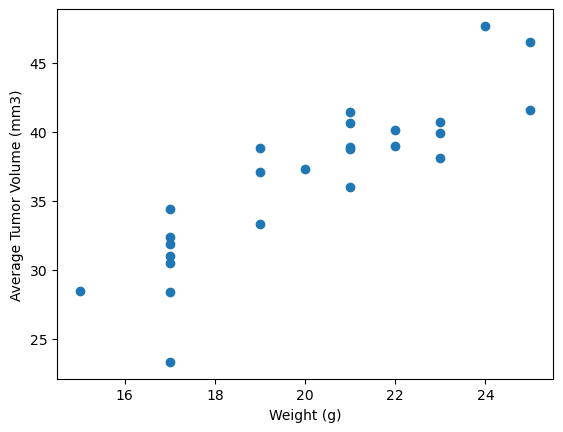

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88


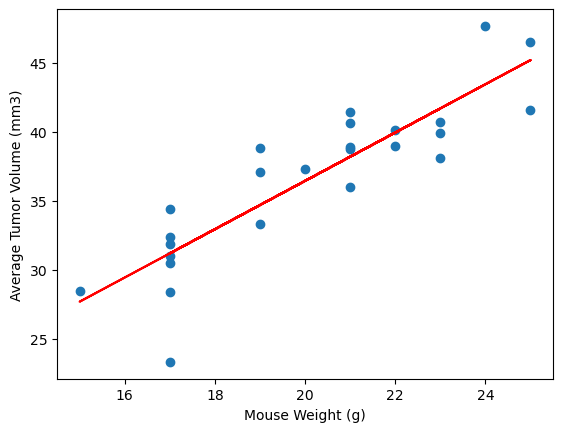

In [41]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group data by Mouse ID and calculate average tumor volume and mouse weight
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient = round(average_tumor_volume.corr(mouse_weight), 2)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

# Calculate the predicted tumor volume values using the linear regression model
predicted_tumor_volume = slope * mouse_weight + intercept

# Create a scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', label='Data Points')
plt.plot(mouse_weight, predicted_tumor_volume, 'r-', label='Linear Regression')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

plt.show()